<a href="https://colab.research.google.com/github/falng2/AI-660710711/blob/main/labw6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Thu Aug 28 08:12:42 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   52C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pcbreviglieri/pneumonia-xray-images")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/pneumonia-xray-images


In [ ]:
os.listdir(path)


['val', 'test', 'train']

In [ ]:
train_path = os.path.join(path, 'train')
train_path

'/kaggle/input/pneumonia-xray-images/train'


Sample image files in 'normal' class:
['NORMAL2-IM-0771-0001.jpeg', 'IM-0675-0001.jpeg', 'IM-0421-0001.jpeg', 'NORMAL2-IM-0531-0001.jpeg', 'NORMAL2-IM-0416-0001-0002.jpeg']

Sample image files in 'opacity' class:
['person1180_virus_2010.jpeg', 'person1230_virus_2081.jpeg', 'person124_virus_238.jpeg', 'person746_virus_1369.jpeg', 'person588_bacteria_2422.jpeg']


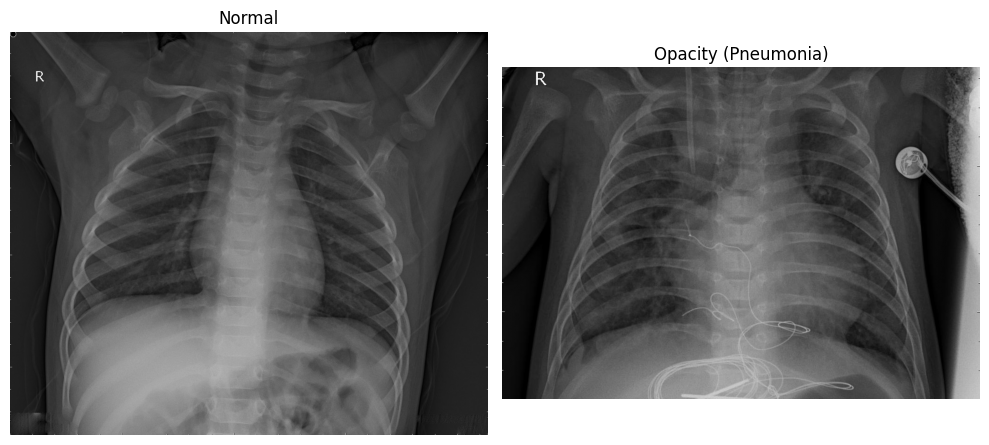

In [ ]:
normal_path = os.path.join(train_path, 'normal')
opacity_path = os.path.join(train_path, 'opacity')

print("\nSample image files in 'normal' class:")
print(os.listdir(normal_path)[:5])

print("\nSample image files in 'opacity' class:")
print(os.listdir(opacity_path)[:5])

# Load and display a few sample images
plt.figure(figsize=(10, 5))

# Display a normal image
normal_img_path = os.path.join(normal_path, os.listdir(normal_path)[0])
normal_img = Image.open(normal_img_path)
plt.subplot(1, 2, 1)
plt.imshow(normal_img, cmap='gray')
plt.title('Normal')
plt.axis('off')

# Display an opacity image (representing pneumonia)
opacity_img_path = os.path.join(opacity_path, os.listdir(opacity_path)[0])
opacity_img = Image.open(opacity_img_path)
plt.subplot(1, 2, 2)
plt.imshow(opacity_img, cmap='gray')
plt.title('Opacity (Pneumonia)')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from collections import Counter
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

import tensorflow as tf

In [ ]:
train_dir = os.path.join(path, 'train')
val_dir = os.path.join(path, 'val')
test_dir = os.path.join(path, 'test')

img_size = (350, 350)
batch_size = 32

# Create ImageDataGenerators
# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

# No data augmentation for validation and test, only rescaling
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    color_mode='grayscale'
)

validation_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    color_mode='grayscale'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False, # Keep data in order for evaluation
    color_mode='grayscale'
)

print("Data generators created:")
print(f"Training generator: {train_generator}")
print(f"Validation generator: {validation_generator}")
print(f"Test generator: {test_generator}")

Found 4192 images belonging to 2 classes.
Found 1040 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Data generators created:
Training generator: <keras.src.legacy.preprocessing.image.DirectoryIterator object at 0x7fcb76de6c00>
Validation generator: <keras.src.legacy.preprocessing.image.DirectoryIterator object at 0x7fcb76dec3b0>
Test generator: <keras.src.legacy.preprocessing.image.DirectoryIterator object at 0x7fcaeaf5e180>


In [ ]:
train_dir = os.path.join(path, 'train')
val_dir = os.path.join(path, 'val')
test_dir = os.path.join(path, 'test')

img_size = (350, 350)
batch_size = 32

# Create ImageDataGenerators
# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

# No data augmentation for validation and test, only rescaling
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    color_mode='grayscale'
)

validation_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    color_mode='grayscale'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False, # Keep data in order for evaluation
    color_mode='grayscale'
)

print("Data generators created:")
print(f"Training generator: {train_generator}")
print(f"Validation generator: {validation_generator}")
print(f"Test generator: {test_generator}")

Found 4192 images belonging to 2 classes.
Found 1040 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Data generators created:
Training generator: <keras.src.legacy.preprocessing.image.DirectoryIterator object at 0x7fcb76f92630>
Validation generator: <keras.src.legacy.preprocessing.image.DirectoryIterator object at 0x7fcaeb4153a0>
Test generator: <keras.src.legacy.preprocessing.image.DirectoryIterator object at 0x7fcaec951fa0>


In [ ]:
batchX, batchY = next(train_generator)
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Batch shape=(32, 350, 350, 1), min=0.000, max=1.000


In [ ]:
labels = list(train_generator.class_indices.keys())
labels

['normal', 'opacity']

In [ ]:
Counter(train_generator.classes)

Counter({np.int32(0): 1082, np.int32(1): 3110})

In [ ]:
weights = compute_class_weight(class_weight = 'balanced', classes = np.unique(train_generator.classes), y = train_generator.classes)
weights

array([1.93715342, 0.67395498])

In [ ]:
cw = dict(zip(np.unique(train_generator.classes), weights))
cw

{np.int32(0): np.float64(1.9371534195933457),
 np.int32(1): np.float64(0.6739549839228296)}

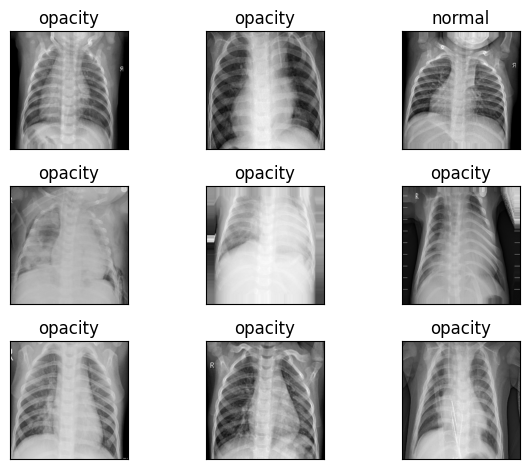

In [ ]:
for i in range(9):
    ax = plt.subplot(3, 3, 1+i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('%s'%(labels[int(batchY[i])]))
    plt.imshow(batchX[i][:,:,0], cmap=plt.get_cmap('gray'))

plt.tight_layout()
plt.savefig('chest_xray.png', dpi=300)

In [ ]:
input_shape = (350, 350, 1)

# Input
inputs = tf.keras.Input(shape=input_shape)

# Feature Extraction
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)

x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)

x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)

x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)

x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='last_conv_layer')(x)

# Image Classification
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# Model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 350, 350, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 348, 348, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 174, 174, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 172, 172, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 86, 86, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 84, 84, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 42, 42, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 40, 40, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ last_conv_layer (Conv2D)        │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,700,897 (25.56 MB)

 Trainable params: 6,700,897 (25.56 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
ReduceLROnPlateau = tf.keras.callbacks.ReduceLROnPlateau

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 2, verbose=1,factor=0.1, min_lr=0.000001)
callbacks_list = [learning_rate_reduction]

In [ ]:
epochs = 20
history = model.fit(
    train_generator,
    callbacks=callbacks_list,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    class_weight=cw # Apply class weights to handle imbalance
)

Epoch 1/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 77s 588ms/step - accuracy: 0.9585 - loss: 0.1096 - val_accuracy: 0.9521 - val_loss: 0.1451 - learning_rate: 1.0000e-04
Epoch 2/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 73s 554ms/step - accuracy: 0.9599 - loss: 0.0926 - val_accuracy: 0.9482 - val_loss: 0.1390 - learning_rate: 1.0000e-04
Epoch 3/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 80s 542ms/step - accuracy: 0.9688 - loss: 0.0786 - val_accuracy: 0.9541 - val_loss: 0.1196 - learning_rate: 1.0000e-04
Epoch 4/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 81s 536ms/step - accuracy: 0.9668 - loss: 0.1011 - val_accuracy: 0.9502 - val_loss: 0.1202 - learning_rate: 1.0000e-04
Epoch 5/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step - accuracy: 0.9624 - loss: 0.1036
Epoch 5: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
131/131 ━━━━━━━━━━━━━━━━━━━━ 71s 545ms/step - accuracy: 0.9624 - loss: 0.1036 - val_accuracy: 0.9492 - val_loss: 0.1240 - learning_rate: 1.0000e-04


In [ ]:
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 251ms/step - accuracy: 0.8910 - loss: 0.3959
Test Loss: 0.2848
Test Accuracy: 0.9161


In [ ]:
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.express as px
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

import pandas as pd

In [ ]:
h1 = go.Scatter(y=history.history['loss'],
                    mode="lines",
                    line=dict(
                        width=2,
                        color='blue'),
                        name="loss"
                   )
h2 = go.Scatter(y=history.history['val_loss'],
                    mode="lines",
                    line=dict(
                        width=2,
                        color='red'),
                        name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data, layout=layout1)
plotly.offline.iplot(fig1)

In [ ]:
h1 = go.Scatter(y=history.history['accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="acc"
                   )
h2 = go.Scatter(y=history.history['val_accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
plotly.offline.iplot(fig1)

In [ ]:
predicted_classes = (model.predict(test_generator, verbose=1) > 0.5).astype("int32")[:,0]


20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 237ms/step


In [ ]:
predicted_classes[:10]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
test_generator.classes[:10]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
def cm_plot(cm, labels):
    x = labels
    y = labels

    z_text = [[str(y) for y in x] for x in cm]
    fig = ff.create_annotated_heatmap(cm, x=x, y=y, annotation_text=z_text, colorscale='blues')

    fig.update_layout(title_text='Confusion Matrix')

    fig.add_annotation(dict(font=dict(color="black",size=13),
                            x=0.5,
                            y=-0.15,
                            showarrow=False,
                            text="Predicted Value",
                            xref="paper",
                            yref="paper"
                           ))

    fig.add_annotation(dict(font=dict(color="black",size=13),
                            x=-0.20,
                            y=0.5,
                            showarrow=False,
                            text="Real Value",
                            textangle=-90,
                            xref="paper",
                            yref="paper"
                           ))

    fig.update_layout(margin=dict(t=50, l=200))
    fig['layout']['yaxis']['autorange'] = "reversed"

    fig['data'][0]['showscale'] = True
    fig.show()

In [ ]:
Counter(test_generator.classes)


Counter({np.int32(0): 234, np.int32(1): 390})

In [ ]:
cm = confusion_matrix(test_generator.classes, predicted_classes)
cm

array([[196,  38],
       [ 13, 377]])

In [ ]:
cm_plot(cm, labels)

In [ ]:
report = classification_report(test_generator.classes, predicted_classes, target_names=labels, digits=4)

print(report)

              precision    recall  f1-score   support

      normal     0.9378    0.8376    0.8849       234
     opacity     0.9084    0.9667    0.9366       390

    accuracy                         0.9183       624
   macro avg     0.9231    0.9021    0.9108       624
weighted avg     0.9194    0.9183    0.9172       624



In [ ]:
y_score = model.predict(test_generator)
y_score = y_score[:,0]

20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 177ms/step


In [ ]:
distribution_df = pd.DataFrame(data={'Score': y_score, 'Class': test_generator.classes})
distribution_df.sample(5)

,Score,Class
130,0.994294,0
604,0.999890,1
144,0.997235,0
606,0.999437,1
159,0.510171,0


In [ ]:
fig = px.histogram(distribution_df, x='Score', color='Class', nbins=50)
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.85)

In [ ]:
fpr, tpr, threshold = roc_curve(test_generator.classes, y_score)
roc_auc = auc(fpr, tpr)

In [ ]:
roc_df = pd.DataFrame(data={'False Positive Rate': fpr, 'True Positive Rate': tpr, 'Threshold': threshold})
roc_df.head()

,False Positive Rate,True Positive Rate,Threshold
0,0.0,0.000000,inf
1,0.0,0.002564,0.999998
2,0.0,0.164103,0.999772
3,0.0,0.169231,0.999769
4,0.0,0.323077,0.999103


In [ ]:
def binary_roc_plot(roc_df, roc_auc):
    fig = px.area(
        data_frame=roc_df,
        x='False Positive Rate',
        y='True Positive Rate',
        hover_data=['Threshold'],
        title=f'ROC Curve (AUC={roc_auc:.4f})',
        width=700, height=500,
    )

    fig.add_shape(
        type='line', line=dict(dash='dash'),
        x0=0, x1=1, y0=0, y1=1
    )

    hovertemplate = 'False Positive Rate=%{x:.4f}<br>True Positive Rate=%{y:.4f}<br>Threshold=%{customdata[0]:.4f}'
    fig.update_traces(hovertemplate=hovertemplate)

    fig.show()

In [ ]:
binary_roc_plot(roc_df, roc_auc)

In [ ]:
from transformers import pipeline
from PIL import Image
import requests
import torch

In [ ]:
import huggingface_hub

huggingface_hub.login()

In [ ]:
pipe = pipeline(
    "image-text-to-text",
    model="google/medgemma-4b-it",
    torch_dtype=torch.bfloat16,
    device="cuda",
)

config.json:   0%|          | 0.00/2.47k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/90.6k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.64G [00:00<?, ?B/s]

KeyboardInterrupt: 

In [ ]:
!pip install tf-keras-vis

In [ ]:
test_image_batch, label_batch = next(test_generator)

image = Image.fromarray((test_image_batch[0] * 255).astype('uint8').squeeze())

image

In [ ]:
label_batch[:32]